### Student Name: Lee Yu Xian
### Student Number: 7233164
### Student Name: Chong Hui Wen
### Student Number: 7311436
### Student Name: Kaycee Tan Wan Ching
### Student Number: 7311540

#### Group 6, Assignment 1

Classification Algorithms
- Random Forest
- Naive Bayes Classifier
- Decisioin Tree Classifier

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV

from sklearn import metrics
from sklearn.metrics import accuracy_score

### Discover and visualise the data

In [56]:
# define the header for each columns
columns_name = [
                "date", "Usage_kWh", "Lagging_Current_Reactive.Power_kVarh", 
                "Leading_Current_Reactive_Power_kVarh",
                "CO2(tCO2)", "Lagging_Current_Power_Factor",
                "Leading_Current_Power_Factor", "NSM", "WeekStatus","Day_of_week",
                "Load_Type"
            ]

# read data from csv file
df = pd.read_csv('Steel_industry_data.csv', names = columns_name, skiprows = 1)

# display the first 5 rows of data
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [58]:
# check the shape of the dataframe
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

#### Findings:

(1) Based on the Pandas' .shape function, it shows this dataframe contains 35040 rows and 11 columns (including target column).

In [4]:
print(df['Load_Type'].unique())

['Light_Load' 'Medium_Load' 'Maximum_Load']


In [57]:
# display all columns and their data types 
# and check whether each column contains null values

encoding_values = {"WeekStatus": {"Weekday":0, "Weekend":1},
                   "Day_of_week": {"Monday":0, "Tuesday":1, "Wednesday":2, 
                                   "Thursday":3, "Friday":4, "Saturday":5, "Sunday":6},
                   "Load_Type": {"Light_Load":0, "Medium_Load":1, "Maximum_Load":2}}

df_encoded = df.replace(encoding_values)

df_encoded.drop(['date'], axis = 1, inplace=True)

# check the updated info
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2(tCO2)                             35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  int64  
 7   WeekStatus                            35040 non-null  int64  
 8   Day_of_week                           35040 non-null  int64  
 9   Load_Type                             35040 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 2.7 MB


#### Findings: 

(1) Some of the columns are not represented in the statistical details of the dataset as columns WeekStatus, Day_of_week and Load_type are object variables and not numerical values.

(2) Week Status and Day_of_week will be hot encoded, as such so both of them could be used to do analysis.

(3) Therefore we will nominally encode the columns as such

WeekStatus = {"Weekday" = 0 , "Weekend" = 1}

Day_of_week = {"Monday" = 0,"Tuesday" = 1,"Wednesday" = 2,"Thursday" = 3,"Friday" = 4,"Saturday"= 5,"Sunday" = 6}

Load_Type = {"Light_Load" = 0,"Medium_Load" = 1, "Maximum_Load" = 2}

In [6]:
# view some basic statistical details of this dataframe
df_encoded.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000,0.284932,2.991781,0.691781
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317,0.451388,2.003433,0.792658
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000,0.000000,1.000000,0.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000,0.000000,3.000000,0.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000,1.000000,5.000000,1.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000,1.000000,6.000000,2.000000


In [7]:
# print out the skewness of each features

print('Skewness of all the features: ')
skewness = df_encoded.skew()
print(skewness)

Skewness of all the features: 
Usage_kWh                               1.197394
Lagging_Current_Reactive.Power_kVarh    1.437899
Leading_Current_Reactive_Power_kVarh    1.734314
CO2(tCO2)                               1.149355
Lagging_Current_Power_Factor           -0.606126
Leading_Current_Power_Factor           -1.511984
NSM                                     0.000000
WeekStatus                              0.952975
Day_of_week                             0.003109
Load_Type                               0.606465
dtype: float64


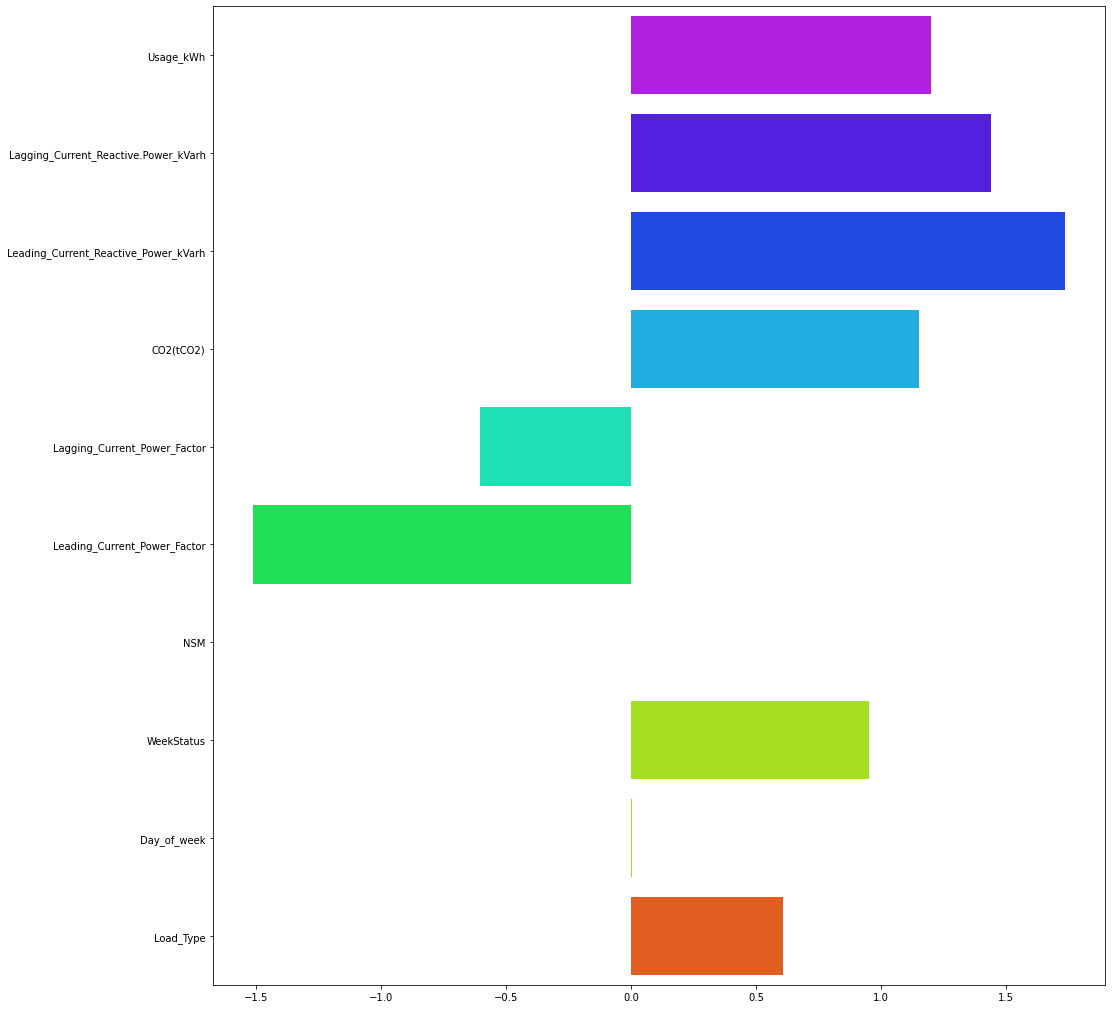

In [8]:
# set up the figure size 
plt.figure(figsize=(16,18))

# plot out the diagram to have a clear view of the skewness
sns.barplot(x=df_encoded.skew(), y=skewness.index, palette = 'gist_rainbow_r')

# show the plot
plt.show()

#### Findings:

Usage_kWh                               1.197394
Lagging_Current_Reactive.Power_kVarh    1.437899
Leading_Current_Reactive_Power_kVarh    1.734314
CO2(tCO2)                               1.149355

Leading_Current_Power_Factor           -1.511984

(1) Usage_kWh, Lagging_Current_Reactive, Leading_Current_Reactive and CO2(tCO2) are extremely right skewed. (Having values more than 1)

(2) Leading_Current_Power_Factor is extremely left skewed. (Having values less than 1)

In [9]:
#  returns the correlation matrix of the dataframe
corr_matrix = df_encoded.corr()
corr_matrix = corr_matrix['Load_Type'].sort_values(ascending=False)
corr_matrix.head()

Load_Type                       1.000000
Usage_kWh                       0.614570
CO2(tCO2)                       0.610653
Lagging_Current_Power_Factor    0.519189
NSM                             0.482767
Name: Load_Type, dtype: float64

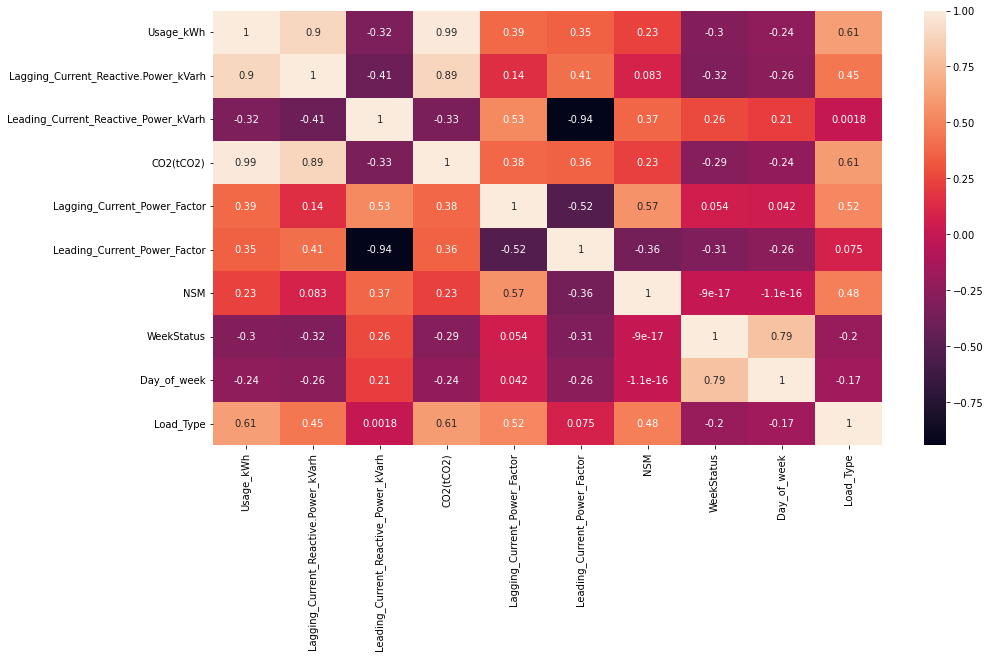

In [10]:
# visualize the correlation of all columns in this dataframe
plt.figure(figsize=(15,8))

# using heapmap to plot
sns.heatmap(df_encoded.corr(), annot=True)

# show the plot
plt.show()

# Findings

(1) There seems to be positive correlations against 'Load_Type' with  attributes such as 'Usage_kWh','CO2(tCO2)','Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM' with p value close to and greater than 0.5

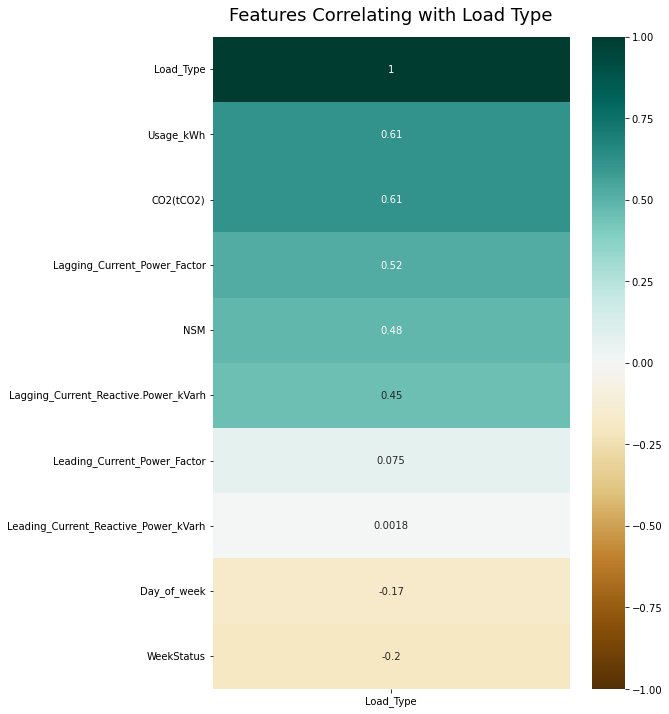

In [11]:
# visualize the correlation of all columns in this dataframe
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_encoded.corr()[['Load_Type']].sort_values(by='Load_Type', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Load Type', fontdict={'fontsize':18}, pad=16);

#### Findings: 

0.9 to 1 positive or negative indicates a very strong correlation.
0.7 to 0.9 positive or negative indicates a strong correlation.
0.5 to 0.7 positive or negative indicates a moderate correlation.
0.3 to 0.5 positive or negative indicates a weak correlation.
0 to 0.3 positive or negative indicates a negligible correlation.

Based on above, it can be observed that:

(1) CO2 (tCO2) has a strong positive correlation with the target (Load_Type) of 0.61. As such, this means that we will be able to get more cohesive information from CO2 (tCO2) for Load_Type. 

(2) Next, as seen from the figure, Usage_kWh also has a strong positive correlation with the target (Load_Type), giving it 0.61. This also means that we can retrieve useful information for Load_Type. 

(3) The weakest correlation amongst the attributes would be Leading_Current_Reactive_Power_kVarh, of which gives a negative correlation of 0.0018. As such, we are unable to use the attribute to get useful information regarding Load_Type. 

(4) The second weakest correlation is Leading_Current_Power_Factor which give a negative correlation of -0.075.

In [12]:
# show the tota number of each load types in this dataframe
df.groupby('Load_Type').size()

Load_Type
Light_Load      18072
Maximum_Load     7272
Medium_Load      9696
dtype: int64

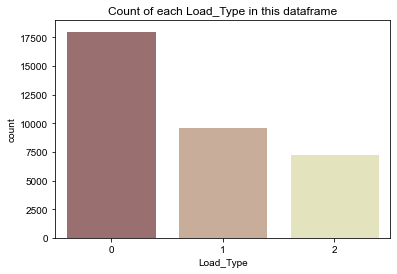

In [13]:
# visualize the count of each 'Load_Type' in this dataframe
plt.title('Count of each Load_Type in this dataframe')
sns.set_style('whitegrid')
sns.countplot(x=df_encoded['Load_Type'], palette = 'pink')

plt.show()

#### Findings:

(1) The highest number of count of Load_Type is Light_Load, consisting of count 18072.  

(2) The second most count for Load_Type would be Medium_Load. 

(3) The least number of count of Load_Type is Maximum_Load.

(4) As such, the figure shows that Light_Load and Medium_Load are the most frequently used type of Load_Type. 

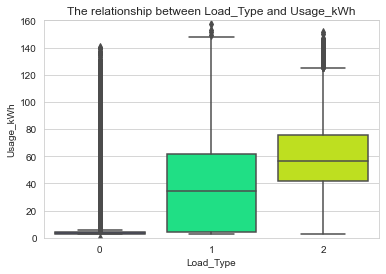

In [14]:
# Visualize the relationship between cover_type and elevation
plt.title('The relationship between Load_Type and Usage_kWh')

graph = sns.boxplot(data=df_encoded, x='Load_Type', y='Usage_kWh', palette='gist_rainbow_r')
graph.set_ylim(0, 160)

plt.show()

#### Findings:

(1) Maxium_Load is the highest elevation level, which median falls around 50. It also contains upper outlier falling between 120-150. 

(2) As compared with the other Load Types, most of the Medium_Load are in the lowest elevation level, in which the median falls around 40, and contains upper outliers. Its minimum usage_kWh is at 0 at maximum around 60. 

(3) Light_Load has all outliers and no distinct median, representing a high variance. As such, this may plot an accurate relation between usage_kwh and load_type.

(4) Not accounting for outliers, Light_Load should be easily distinguishable from Medium and Maximum_Load. 

(5) If used alone, It might not be a good discriminative feature.

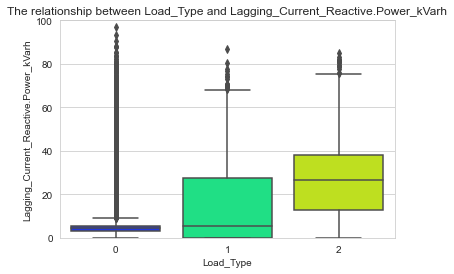

In [73]:
# Visualize the relationship between Load_Type and Lagging_Current_Reactive.Power_kVarh
plt.title('The relationship between Load_Type and Lagging_Current_Reactive.Power_kVarh')

graph = sns.boxplot(data=df_encoded, x='Load_Type', y='Lagging_Current_Reactive.Power_kVarh', palette='gist_rainbow_r')
graph.set_ylim(0, 100)

plt.show()

#### Findings:

(1) Light_Load contains the most number of upper outliers, falling between 10 and 100. 
As such, this might make it difficult to predict. 

(2) All the load type contains outliers. 

(3) The 1st quartile of Light_Load falls around 5, which is the same as Medium_Load. 

(4) The median for Maximum_Load is the highest at 30. 

(5) The minimum and maximum for Medium_Load and Maximum_Load is the same which is 0 and 90, whereas the maximum for Light_Load reaches to 100. 

(6) This is a not a recommended feature since there are a lot of outliers which can skew the results.

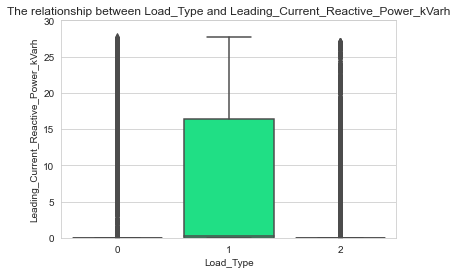

In [16]:
# Visualize the relationship between Load_Type and Leading_Current_Reactive_Power_kVar
plt.title('The relationship between Load_Type and Leading_Current_Reactive_Power_kVarh')

graph = sns.boxplot(data=df_encoded, x='Load_Type', y='Leading_Current_Reactive_Power_kVarh', palette='gist_rainbow_r')
graph.set_ylim(0, 30)

plt.show()

#### Findings:

(1) Light_Load and Maximum_Load has a significant number of outliers, except Medium_Load where there is no outliers at all.

(2) All of the Load Types have the same minimum slope which is 0.

(3) Light_Load has the most outliers are compared with the other Load Types, and its outlier reaches around 28. From this, we can deduce that there are many unusual observations for Light_Load Type. 

(4) Medium_Load has a median of around 7.

(5) As such, with large amount of outliers observed, this suggests that it is not a good feature in determining load type. 

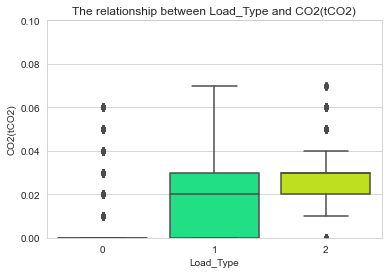

In [17]:
# Visualize the relationship between cover_type and Horizontal_Distance_To_Hydrology
plt.title('The relationship between Load_Type and CO2(tCO2)')

graph = sns.boxplot(data=df_encoded, x='Load_Type', y='CO2(tCO2)', palette='gist_rainbow_r')
graph.set_ylim(0, 0.1)

plt.show()

#### Findings:

(1) Light_Load consists of outliers, thus there is no fixed range. Light_Load minimum value also does not start with 0. There seems to not be an interquartile range, which might be because majority of the CO2 values are 0.00

(2) The upper quartile range for Medium_Load falls between 0.03 to 0.07, whereas it falls between 0.03 to 0.04 for Maximum_Load. 

(3) Only Maximum_Load has upper outliers. Medium_Load does not contain any outliers. 

(4) Medium_Load has the maximum value of CO2 of 0.07. 

(5) The range of the load type typically falls between the range of 0.00 to 0.07. 

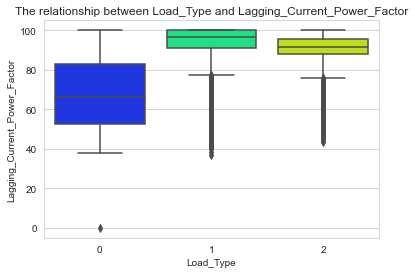

In [18]:
# Visualize the relationship between Load_Type and Lagging_Current_Power_Factor
plt.title('The relationship between Load_Type and Lagging_Current_Power_Factor')
sns.boxplot(data=df_encoded, x='Load_Type', y='Lagging_Current_Power_Factor', palette='gist_rainbow_r')

plt.show()

#### Findings:

(1) All 3 Load Type have lower outliers, with Light_Load at 0, and Medium_Load and Maximum_Load ranging from 39 to around 80. 

(2) All the load types do not contain any upper outliers. 

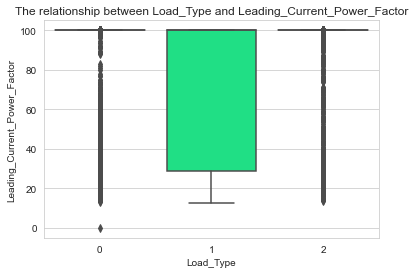

In [19]:
# Visualize the relationship between Load_Typee and Leading_Current_Power_Factor
plt.title('The relationship between Load_Type and Leading_Current_Power_Factor')
sns.boxplot(data=df_encoded, x='Load_Type', y='Leading_Current_Power_Factor', palette='gist_rainbow_r')

plt.show()

#### Findings:

(1) There are outliers for Light_Load and Maximum_Load, and there are no outliers for Medium_Load.  

(2) The median for Medium_Load is at 60. 

(3) Most of the outliers are from the range between 10 to 100, with Light_Load having outlier starting at 0. 

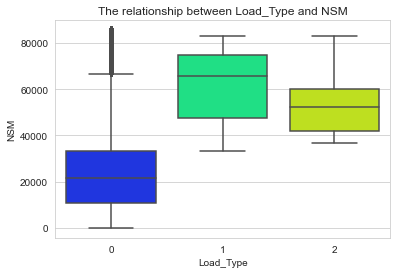

In [20]:
# Visualize the relationship between Load_Type and NSM
plt.title('The relationship between Load_Type and NSM')
sns.boxplot(data=df_encoded, x='Load_Type', y='NSM', palette='gist_rainbow_r')

plt.show()

#### Findings:

(1) As above boxplots, only Light_Load has outliers ranging from around 65000 to 85000. 

(2) Medium_Load and Maximum_Load does not have any outliers. 

(3) The Median differs greatly for all three load types, Light_Load around 21000, Medium_Load around 65000 and Maximum_Load around 70000. 

(4) Light_Load still follows the trend of consisting of excessive outliers. 

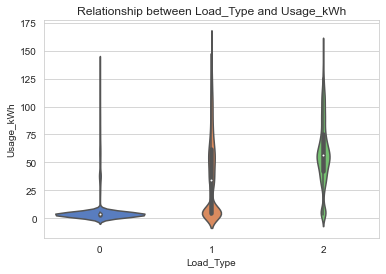

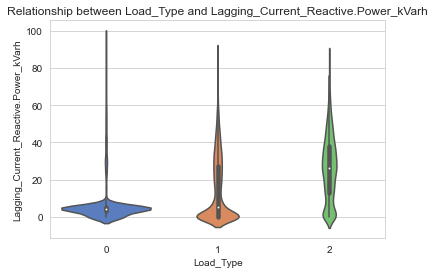

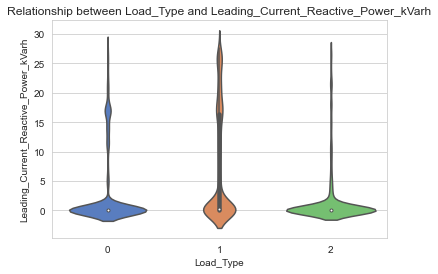

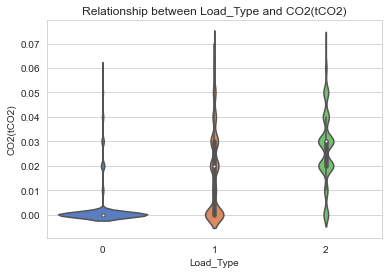

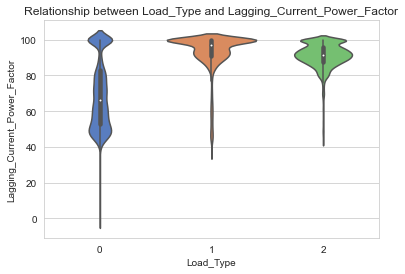

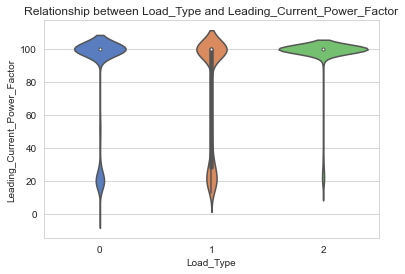

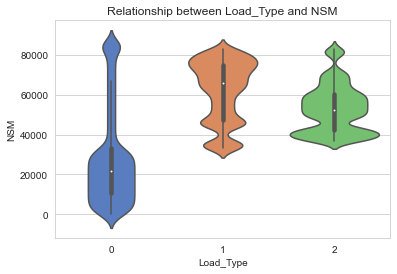

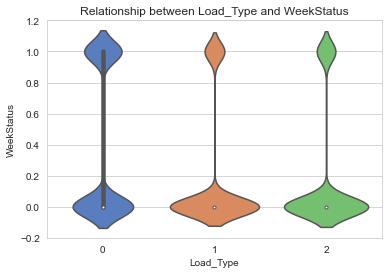

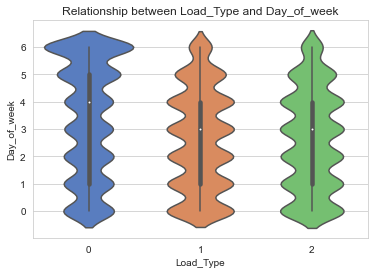

In [21]:
# get all the columns name
all_columns = df_encoded.columns

# eliminate the target column
eliminate_target = len(all_columns)-1

# x-axis is for target column
x = all_columns[eliminate_target]

# y-axis is for the features
y = all_columns[0:eliminate_target]

# plot out the graph
for a in range(0, 9):
    sns.violinplot(data=df_encoded, x=x, y=y[a], palette="muted")
    
    # set the title for each of the graphes
    plt.title('Relationship between Load_Type and ' + all_columns[a])
    plt.show()

#### Findings:

(1) "Relationship between Load_Type and Usage_kWh" - Medium_Load and Maximum_Load have lower frequency compared to Light_Load. Majority of the data for Light_Load are low valued.

(2) "Relationship between Load_Type and Lagging_Current_Reactive.Power_kVarh" - Data for Maximum_Load is distributed more evenly compared to Light_Load and Medium_Load where they have higher frequencies for low values.

(3) "Relationship between Load_Type and Leading_Current_Reactive_Power_kVarh" - Majority of the data are low valued for all 3 load types

(4) "Relationship between Load_Type and CO2(tCO2)" - Data is low valued for Light_Load while data are more evenly distributed at the decimal points for Medium_Load and Maximum_Load

(5) "Relationship between Load_Type and Lagging_Current_Power_Factor" - Majority of the data for Medium_Load and Maximum_Load are high valued, ranging from 80-110. Data for Light_Load is more evenly distributed between 40-150 range.

(6) "Relationship between Load_Type and Leading_Current_Power_Factor" - Data for Light_Load and Medium_Load are similar, with majority of the data at 20 or 100, while for Maximum_Load, majority of the data is at 100.

(7) "Relationship between Load_Type and NSM" - The median for Light_Load is slightly lower at 20000, while Medium_Load and Maximum_Load are higher at 65000 and 55000 respectively.

(8) "Relationship between Load_Type and WeekStatus" - The data for all 3 load types are similar, with majority of the data either at 0.0 or 1.0

(9) "Relationship between Load_Type and Day_of_week" - Data for all 3 load types are evenly distributed throughout.

### Prepare the data for machine learning algorithms

### Checking if the dataset consist of any missing values 

In [22]:
# Check any missing data for each columns
print(df_encoded.isnull().values.any())

False


#### Findings:

(1) It gives a False result which means that this dataframe does not consist any null values.

In [23]:
# seperate the dataset as feature variables and response variable and store them to X and y variables
X = df_encoded.drop('Load_Type', axis=1)
y = df_encoded['Load_Type']

# use StratifiedShuffleSplit to split the data 
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
sss.get_n_splits(X,y)

# using for loop to do the splits
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#double check the size of the dataframe     
print(X_train.shape , X_test.shape)
print(y_train.shape , y_test.shape)

# using StandardScalar to help us impore the accuracy of the prediction model
scalar = StandardScaler()

# fit and transform the train data
X_train = scalar.fit_transform(X_train)

# transform the test data
X_test = scalar.transform(X_test)

(28032, 9) (7008, 9)
(28032,) (7008,)


#### Findings:

(1) After using StratifiedShuffleSplit to split the data, now the amount of training data becomes 28032 and the amount of testing data becomes 7008. 

## 3 Classification Models

### (1) Random Forest

In [24]:
# instantiate the RandomForestClassifier() model
rfc = RandomForestClassifier(n_estimators=150, max_depth=15, criterion='gini', random_state=42069, n_jobs=-1)

# fit the model with X_train and y_train
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=150, n_jobs=-1,
                       random_state=42069)

In [25]:
# make prediction with X_test
y_pred = rfc.predict(X_test)

# check our models performance
print(metrics.accuracy_score(y_test, y_pred))

0.9128139269406392


In [26]:
# check for overfitting
# using X_train to do predict and compare with X_test result
y_pred = rfc.predict(X_train)

# check our models performance
print(metrics.accuracy_score(y_train, y_pred))

0.9576555365296804


#### Findings:
(1) Based on the result above, when the parameter is set for Random Forest Classifier (n_estimators=150, max_depth=15, criterion='gini', random_state=42, n_jobs=-1) which gives us 91% when using testing set data to do prediction. When we use the model to predict the trained data, it gives us 95%, giving it a 4% difference. The difference is pretty insignificant. Thus, as such, overfitting does not occur in the model. In conclusion, the model is good for predicting both training and testing data. 

### Tuning the Random Forest model

In [27]:
# Set the RandomForestClassifier model and set the random_state =  42069 to make sure we can get the same result everytime
rdfc = RandomForestClassifier(random_state=42069)

# set the hyperparameters for the gridsearchcv to choose the best one
rdfc_param = {
              'n_estimators':[100, 150, 200, 300, 450, 550, 650],
              "criterion": ["gini", "entropy"],
              'max_depth': [13, 15, 17, 19],
              'max_features':['auto', 'sqrt']
             }

# instantiate the gridsearchcv to get the hyperparameter
rdfc_gscv = GridSearchCV(estimator=rdfc, param_grid=rdfc_param, cv=3, n_jobs=-1)

# fit the model with X_train and y_train
rdfc_gscv.fit(X_train, y_train)

# check the best performance of parameters
print(rdfc_gscv.best_params_)

# print out the result
print(rdfc_gscv.best_score_)

{'criterion': 'gini', 'max_depth': 17, 'max_features': 'auto', 'n_estimators': 550}
0.9071061643835616


In [28]:
# check for overfitting
# using X_train to do predict and compare with X_test result
y_pred = rdfc_gscv.predict(X_train)

# check our models performance
print('Accuracy : ',metrics.accuracy_score(y_train, y_pred)*100 ,'%')

Accuracy :  97.46361301369863 %


#### Findings:

After tuning the model:

(1) It is observed that the accuracy has increased. Before tuning, the accuracy was around 90%. After tuning was done, the accuracy increased to 97%. As such, there is an improvement of 7%.

(2) The tuning model does a prediction of the testing set data, which accuracy returns 90%. Whereas for the training data, the accuracy returns 97%. As such, this reinforces that overfitting does not occur, making the model good for both predicting the training and testing data. 

(3) The max_depth in Random Forest Classifier has a large impact. When max_depth = 15, the accuracy given was 90%. During tuning, max_depth was set in a range and it chose the largest value of 17, which increased the accuracy to 97%. As such, we can conclude that we will be able to retrieve more useful information if the decision tree is allowed a higher number of splits. However, if the max_depth of the tree is not limited, overfitting will occur. Therefore, we have to trial and error the various values to get the optimal result to avoid overfitting. 

(4) As observed, the n_estimors also has a huge affect on the model. Before tuning, the n_estimors = 150 was set, giving a 91% accuracy but during tuning, i set the n_estimors in range of [100, 200, 300, 450, 550] and the gridsearchcv took the maximum value of 550 and the accuracy increased to 98%. As such, we can conclude that n_estimors controls the number of tree inside the classifier, and higher values does not necessary increase the accuracy. This might help us in achieving a more general result but trial and error is required, noting that more time is require for the model to run as more trees are generated when n_estimors is higher. 

### (2) Naive Bayes Classifier

In [29]:
# instantiate the GaussianNB() model
nbc = GaussianNB(var_smoothing=3e-9)

# fit the model with X_train and y_train
nbc.fit(X_train, y_train)

# make prediction with X_test
y_pred = nbc.predict(X_test)

# check our models performance
print(metrics.accuracy_score(y_test, y_pred))


0.713898401826484


In [30]:
# check for overfitting
# using X_train to do predict and compare with X_test result
y_pred = nbc.predict(X_train)

# check our models performanc
print(accuracy_score(y_train, y_pred))

0.7087970890410958


#### Findings:

(1) When the GaussianNB parameter was set as (var_smoothing=3e-9), in which a prediction is done on the testing data, an accuracy of 71%. Whereas while using the same model to predict the training data set, the accuracy is 70.8%. There is only a difference of 0.03% in terms of accuracy, which is insignificant and as such, overfitting would not be an issue. 

### Tuning the Naive Bayes Classifier

In [31]:
# instantiate the GaussianNB() model
nbc2 = GaussianNB()

# set the hyperparameters for the gridsearchcv to choose the best one
# use var_smoothing as the hyperparameter
params = {'var_smoothing': np.logspace(0,-9, num=50)}

# using gridsearchcv to get the best hyperparameter
nbc2_gscv = GridSearchCV(estimator=nbc2, param_grid=params, cv=3, n_jobs=-1, scoring='accuracy') 

# fit the model with X_train and y_train
nbc2_gscv.fit(X_train, y_train)

# check the best performance of parameters
print(nbc2_gscv.best_params_)

# print out the result
print(nbc2_gscv.best_score_)

{'var_smoothing': 0.0004941713361323833}
0.7094748858447488


In [32]:
# check for overfitting
# using X_train to do predict and compare with X_test result
y_pred = nbc2_gscv.predict(X_train)

# check our models performanc
print(accuracy_score(y_train, y_pred))

0.7087970890410958


#### Findings：

After tuning the model:

(1) It is observed that the accuracy becomes 70.9%, comparing the accuracy of 71.3% before tuning. This shows that the accuracy has dropped in insignificant percentage. 

(2) The tuning model does a prediction of the testing set data of 70.9% and when predicting the training data, the prediction is around 70.8%. There is a marginal difference of 0.01% thus it will not affect overfitting. 

(3) As the parameter 'var_smoothing' is being set in a larger range of values, and gridsearchcv chose 0.0004 as the best value for the model. In conclusion, when the 'var_smoothing' increases, the accuracy becomes higher as well. 

### (3) Decision Tree classifier

In [33]:
# instantiate the DecisionTreeClassifier() model
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=13, random_state=50)

# fit the model with X_train and y_train
dtc.fit(X_train, y_train)

# make prediction with X_test
y_pred = dtc.predict(X_test)

# check our models performance
print(metrics.accuracy_score(y_test, y_pred))

0.9022545662100456


In [34]:
# check for overfitting
# using X_train to do predict and compare with X_test result
y_pred = dtc.predict(X_train)

# check our models performance
print(metrics.accuracy_score(y_train, y_pred))

0.9179152397260274


#### Findings:

(1) I set the parameter of the Decision Tree Classifier as (criterion="entropy", max_depth=13, random_state=50), a prediction is done on the testing data, which in return gives an accuracy of 90.22%. Using the same model to predict the training data set, the accuracy increases slightly to 91.79%. There is only a slight difference amongst both data sets of 1.57%. As such, we can conclude that overfitting will not be an issue. 

### Tuning the Decision Tree Classifier

In [35]:
# tuning the Decision Tree model

# instantiate the DecisionTreeClassifier() model
dtc2 = DecisionTreeClassifier(random_state=42)

# set the hyperparameters for the gridsearchcv to choose the best one
dtc_param = { 
              "criterion": ["gini", "entropy"],
              "max_depth": [3, 5, 8, 10, 12, 14, 15, 16],
              "min_samples_leaf": [1, 2, 3, 4, 5]
             }

# using gridsearchcv to get the best hyperparameter
dtc_gscv = GridSearchCV(estimator=dtc2, param_grid=dtc_param, cv=3, n_jobs=-1)

# fit the model with X_train and y_train
dtc_gscv.fit(X_train, y_train)

# check the best performance of parameters
print(dtc_gscv.best_params_)

# print out the result
print(dtc_gscv.best_score_)


{'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 4}
0.8948701484018264


In [36]:
# check for overfitting
# using X_train to do predict and compare with X_test result
y_pred = dtc_gscv.predict(X_train)

# check our models performance
print(metrics.accuracy_score(y_train, y_pred))

0.926726598173516


#### Findings:

After tuning the model:

(1) The accuracy of the train data set is 90% whereas the accuracy of the of test data set is 89%. There is an insignificant reduction of model accuracy. 

(2) The tuning model does the prediction of the testing data of 91% and gets 92% when predicting the training data set. There is only a 1% difference, thus implying that there is no overfitting problem.

(3) On the other hand, we notice that in the parameter criteria, gridsearchcv chose 'Entropy' to be the hyperparameter. 

(4) It is observed that max_depth in Decision Tree Classifier has a huge influence on the results. As the max_depth is set to 13 before tuning the model, there is an accuracy of 90%. While tuning the model, a range is given for max_depth and the value 14 was chosen, therefore influencing the accuracy to 89%. 

(5) Morever, the parameter min_samples_leaf were set in a range of [1, 2, 3, 4, 5] and gridsearchcv chose the value '4' as the min_samples_leaf to provide better accuracy. 

(6) In conclusion, the number of splits each tree is allowed to make, allows more information to be gathered about the data. As such, if there are no limits set on the max_depth of the tree, overfitting would occur. Thus, trial and error is required on the different values to get the optimal result and avoid overfitting. 

#### Conclusion for findings in comparison of 3 classification models used.

Various models such as Random Forest model, Naive Bayes Classifier model and Decisioin Tree Classifier model was used in this task to solve the classification problem.

Amongst the models used, Random Forest model and Decision Tree Classifier model was observed to have generated the best results after tuning the models, getting approximately 90%. They were able to generate accuracy of around 90% before tuning as well. 

Whereas for the Naive Bayes Classifier model, it did relatively poorer in solving the classification problem comparatively, giving only an accuracy of roughly 70% pre-tuning. The accuracy remains around the same despite tuning the model. Therefore, we can assume that has reached it performance limit for its use case using the current dataset. 

Lastly, the 3 models used did not present any underfitting and overfitting problem. 

## User-Defined Transform functionality

In [63]:
# define a class to generate a user-defined-transform function
# generate a user-defined-transform function 
class UserDefinedTransform(BaseEstimator, TransformerMixin):
    # initialize the constructor
    def __init__(self, Usage_kWh_lvl=True):
        self.Usage_kWh_lvl = Usage_kWh_lvl
    
    # fit function
    def fit(self, X, y=None):
        return self
    
    # transform function 
    def transform(self, X, y=None):
         # Conditional if else statement 
        if self.Usage_kWh_lvl:
            
            # split the Usage_kWh range into  and putting them into Usage_kWh columns 
            df['Usage_kWh_Level'] = pd.cut(df['Usage_kWh'], 5, precision=0, labels=[1,2,3,4,5])
            
            # inserting column Elevation_Group to the right position
            Usage_kWh_lvl = df.pop('Usage_kWh_Level')
            df.insert(1, 'Usage_kWh_Level', Usage_kWh_lvl)
            
            # return result 
            return np.c_[X, Usage_kWh_lvl]
        else:
            # Inform the user of any error in creating a new feature
            return print("Kindly check the values of 'Usage_kWh_Level'")

#### Findings:

(1) A new feature called 'Usage_kWh_Level' as the Usage_kWh feature contains a large range of values, with all Load_Types have many outliers. 

(2) We split the new feature 'Usage_kWh_Level' values into 5 integers, ranging from 1-5. The range was picked due to the large value range in Usage_kWh, and is essential to prevent any information loss. 

In [64]:
#create a variable called temp 
temp = df_encoded
temp.shape

(35040, 10)

#### Findings

(1) Prior to transformation, temp contains 35040 and 10 columns (exclude the target column). 

In [65]:
#append it to the columns and print
cn = list(temp.columns)
cn.append("Usage_kWh_Level")
cn

['Usage_kWh',
 'Lagging_Current_Reactive.Power_kVarh',
 'Leading_Current_Reactive_Power_kVarh',
 'CO2(tCO2)',
 'Lagging_Current_Power_Factor',
 'Leading_Current_Power_Factor',
 'NSM',
 'WeekStatus',
 'Day_of_week',
 'Load_Type',
 'Usage_kWh_Level']

In [66]:
# Create a class object, transform the new feature and print the shape of the dataframe
# shape of dataframe excludes target column 
add_attribute = UserDefinedTransform(Usage_kWh_lvl=True)
temp = pd.DataFrame(data= add_attribute.transform(temp),columns=cn)
temp.shape

(35040, 11)

#### Findings:

(1) With transformation, the new feature 'Usage_kWh_Level', X contains 35040 rows and 11 columns (excluding the target column). 

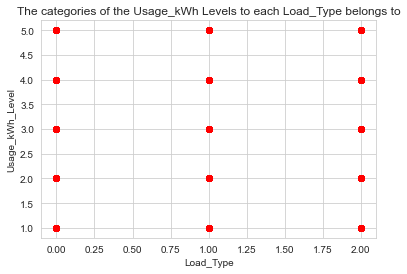

In [67]:
#plotting the scatter graph 
plt.scatter(temp['Load_Type'], temp['Usage_kWh_Level'], c='red')

# set the graph title
plt.title('The categories of the Usage_kWh Levels to each Load_Type belongs to')

# set the xlabel and ylabel
plt.xlabel('Load_Type')
plt.ylabel('Usage_kWh_Level')

# show the graph
plt.show()

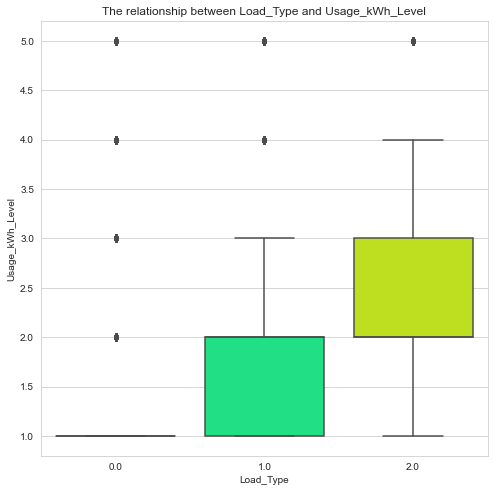

In [69]:
# Visualize the relationship between Usage_kWh_Level and Load_Type
plt.figure(figsize=(8, 8))
plt.title('The relationship between Load_Type and Usage_kWh_Level')
sns.boxplot(data=temp, x='Load_Type', y='Usage_kWh_Level', palette='gist_rainbow_r')
#show the plot
plt.show()

#### Findings

(1) As observed, Usage_kWh_Level Level 1-5 occurs for Medium_Load and Maximum_Load, but Level 1 is not present for Light_Load. 

(2) Hence, Usage_kWh_Level can be used in place of Usage_kWh as values are more distinct. 

# Training Model with new feature (Usage_kWh_Level)

In [60]:
# seperate the dataset as feature variables and response variable and store them to X and y variables
X = temp.drop('Load_Type', axis=1)
X = temp.drop('Usage_kWh',axis = 1)
y = temp['Load_Type']

# use StratifiedShuffleSplit to split the data 
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=123)
sss.get_n_splits(X,y)

# using for loop to do the splits
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#double check the size of the dataframe     
print(X_train.shape , X_test.shape)
print(y_train.shape , y_test.shape)

# using StandardScalar to help us improve the accuracy of the prediction model
scalar = StandardScaler()

# fit and transform the train data
X_train = scalar.fit_transform(X_train)

# transform the test data
X_test = scalar.transform(X_test)

(28032, 10) (7008, 10)
(28032,) (7008,)


# Using new data splits to train Decision Tree Classifier


In [61]:
# instantiate the DecisionTreeClassifier() model
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=1234)

# fit the model with X_train and y_train
dtc.fit(X_train, y_train)

# make prediction with X_test
y_pred = dtc.predict(X_test)

# check our models performance
print(metrics.accuracy_score(y_test, y_pred))

1.0


In [62]:
# check for overfitting
# using X_train to do predict and compare with X_test result
y_pred = dtc.predict(X_train)

# check our models performance
print(metrics.accuracy_score(y_train, y_pred))

1.0


#### Findings:
(1) In view of training a decision tree model, despite the fact that the DT max_depth was reduced to 3, the accuracy yield was still at a 100% for both testing and training dataset. 

(2) As this, we are able to ensure overfitting will not be an issue. By transforming and tuning the features and splitting into 5 bins, the accuracy of the model increased from 90% to 100%. 